In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymatgen.core.composition import Composition
from tqdm.auto import tqdm

In [2]:
train_df = pd.read_csv('../Data/train_data_Ef_Eg.csv')
train_df = train_df.drop(['formula_pretty', 'E_f'], axis = 1)
train_df.to_csv('../Data/train_data_Eg.csv',index=False) 
train_df

,material_id,composition,E_g
0,mp-1235216,Li1 P4 Br12 O4,0.5519
1,mp-763425,Li2 Mn4 F14,1.0465
2,mp-1211135,Li2 Nd2 S4 O16,5.3668
3,mp-555303,Li2 Er2 P8 O24,5.7495
4,mp-768922,Li6 V6 B6 O24,0.0000
...,...,...,...
42516,mp-1224669,K16 Tl22 Pd1,0.0000
42517,mp-558482,K17 Fe5 O16,2.0912
42518,mp-640781,K34 In82,0.0000
42519,mp-1225049,K18 Na46 Tl31,0.0000


In [3]:
df = pd.read_csv('../Data/5_APs_with_screened_Ef_Ehull.csv')
prediction_df = pd.DataFrame(columns=['material_id','composition','E_g'])
prediction_df['material_id'] = df.index
prediction_df['composition'] = df['composition']
prediction_df['E_g']=0
prediction_df.to_csv('../Data/prediction_data_Eg.csv',index=False) 
prediction_df

,material_id,composition,E_g
0,0,Li3 I1 O1,0
1,1,Li3 I0.875 N0.125 O1.25,0
2,2,Li3 I0.75 N0.25 O1.5,0
3,3,Li3 I0.625 N0.375 O1.75,0
4,4,Li3 I0.5 N0.5 O2,0
...,...,...,...
8682,8682,K2 H2.25 N1 O1.75,0
8683,8683,K2 H2 N1 O2,0
8684,8684,K2 H1.75 N1 O2.25,0
8685,8685,K2 H1.5 N1 O2.5,0


<font size="6">Machine Learning (ROOST)<font>

Command:  

cd ROOST

python roost-example.py --train --evaluate --data-path ../Data/train_data_Eg.csv --test-path ../Data/prediction_data_Eg.csv  --tasks regression --targets E_g --losses L1 --robust --epochs 100 --ensemble 10  

In [4]:
df = pd.read_csv('../ROOST/results/Eg_prediction_results.csv')
result_df = df.drop(['E_g_ale_n0', 'E_g_ale_n1', 'E_g_ale_n2', 'E_g_ale_n3', 'E_g_ale_n4', 'E_g_ale_n5', 'E_g_ale_n6', 'E_g_ale_n7', 'E_g_ale_n8', 'E_g_ale_n9'], axis = 1)
result_ensemble_mean = result_df.iloc[:,:2].rename(columns={'target':'E_g'})
result_ensemble_mean['E_g'] = [result_df.iloc[i,2:].mean() for i in tqdm(range(len(result_df)))]
result_ensemble_mean.to_csv('../Data/6_APs_with_Eg_prediction_results.csv',index=False)
result_ensemble_mean

  0%|          | 0/8687 [00:00<?, ?it/s]

,material_id,composition,E_g
0,0,Li3 I1 O1,2.552874
1,1,Li3 I0.875 N0.125 O1.25,1.794830
2,2,Li3 I0.75 N0.25 O1.5,2.163237
3,3,Li3 I0.625 N0.375 O1.75,2.397237
4,4,Li3 I0.5 N0.5 O2,2.505686
...,...,...,...
8682,8682,K2 H2.25 N1 O1.75,3.126936
8683,8683,K2 H2 N1 O2,3.124204
8684,8684,K2 H1.75 N1 O2.25,3.184762
8685,8685,K2 H1.5 N1 O2.5,3.253899


In [5]:
screened_df = result_ensemble_mean[(result_ensemble_mean['E_g']>3.0)] 
screened_df.to_csv('../Data/7_APs_with screened_Eg.csv',index=False)
screened_df

,material_id,composition,E_g
19,19,Li3 H0.75 I0.625 N0.375 O1,3.147477
20,20,Li3 H1 I0.5 N0.5 O1,3.383855
21,21,Li3 H1.25 I0.375 N0.625 O1,3.497785
22,22,Li3 H1.5 I0.25 N0.75 O1,3.445726
23,23,Li3 H1.75 I0.125 N0.875 O1,3.377642
...,...,...,...
8682,8682,K2 H2.25 N1 O1.75,3.126936
8683,8683,K2 H2 N1 O2,3.124204
8684,8684,K2 H1.75 N1 O2.25,3.184762
8685,8685,K2 H1.5 N1 O2.5,3.253899


<font size="6">Plot the Energy Bandgap Distribution<font>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

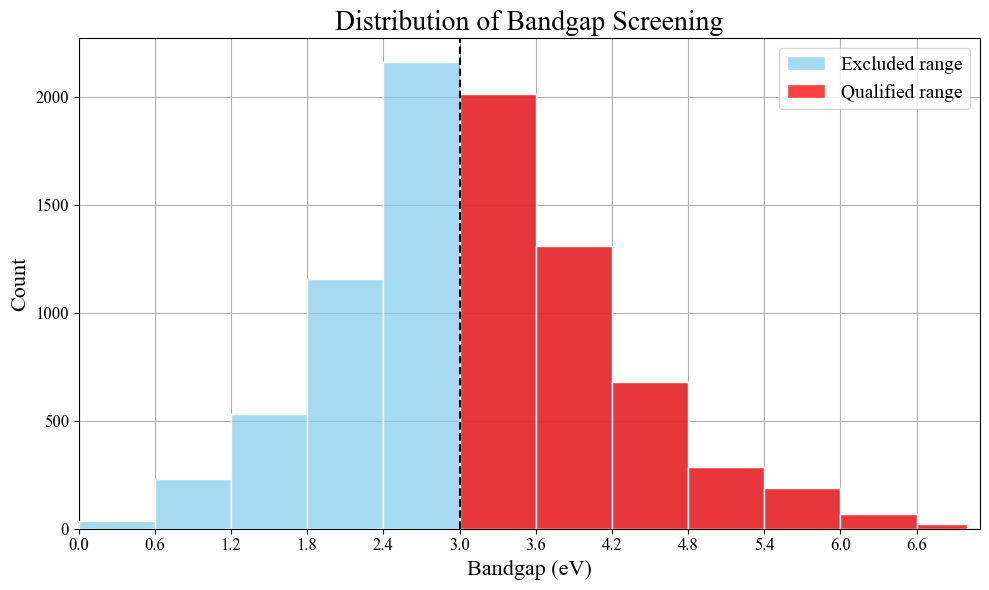

In [11]:
plt.rcParams["font.family"] = "Times New Roman"

data = pd.read_csv('../Data/6_APs_with_Eg_prediction_results.csv')  
Eg = data['E_g']

tick_interval = 0.6
highlight_start = 3.0
highlight_end = 7.0

data_min = Eg.min()
data_max = Eg.max()
xmin = np.floor(data_min*10)/10
xmax = np.ceil(data_max*10)/10
xmin = min(xmin, highlight_start)
xmax = max(xmax, highlight_end)

bins = np.arange(xmin, xmax + tick_interval, tick_interval)
if highlight_end not in bins:
    bins = np.sort(np.append(bins, highlight_end))

highlight_bins = bins[(bins >= highlight_start) & (bins <= highlight_end)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(Eg, bins=bins, kde=False, color="skyblue", edgecolor='white', label='Excluded range', ax=ax, zorder=3)
sns.histplot(Eg[Eg.between(highlight_bins[0], highlight_bins[-1], inclusive="left")], bins=highlight_bins, kde=False, color="red", edgecolor='white', label='Qualified range', ax=ax, zorder=3)

ax.legend()

ax.set_title('Distribution of Bandgap Screening', fontsize=20, fontname='Times New Roman')
ax.set_xlabel('Bandgap (eV)', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('Count', fontsize=16, fontname='Times New Roman')

ax.set_xlim(xmin, xmax)
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_interval))

for xc in [3.0]:
    ax.axvline(x=xc, color='k', linestyle='--', zorder=4)

ax.grid(True, zorder=0)

plt.legend(fontsize='14')
ax.tick_params(labelsize=12)

plt.tight_layout()
#plt.show()

final_fig_no_text_path = '../Figure/Eg_distribution.png'
fig.savefig(final_fig_no_text_path)